In [51]:
!pip install opencv-python
import glob
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.config.experimental import list_physical_devices

In [52]:
print("Num GPUs Available: ", len(list_physical_devices('GPU')))

Num GPUs Available:  0


In [56]:
def getData(path, val, max=1000):
    out_x = []
    out_y = []
    i = 0
    for file in path.glob("*.jpeg"):
        if i == max:
            break
        i+=1
               
        img = cv2.imread(str(file))
        img = cv2.resize(img, (256, 256))
        out_x.append(img)
        out_y.append(val)
        #out.append((file,0))
    return out_x, out_y

train_X,  train_Y= getData(Path("train/NORMAL"),0)
x, y = getData(Path("train/PNEUMONIA"),1)
train_X = train_X + x
train_Y = train_Y + y
train_X = np.stack(train_X).astype(float)
train_Y = np.array(train_Y)

test_X,  test_Y= getData(Path("test/NORMAL"),0)
x, y = getData(Path("test/PNEUMONIA"),1)
test_X = test_X + x
test_Y = test_Y + y
test_X = np.stack(test_X).astype(float)
test_Y = np.array(test_Y)

val_X,  val_Y= getData(Path("val/NORMAL"),0)
x, y = getData(Path("val/PNEUMONIA"),1)
val_X = val_X + x
val_Y = val_Y + y
val_X = np.stack(val_X).astype(float)
val_Y = np.array(val_Y)

In [58]:
train_X/=255
test_X/=255
val_X/=255

In [44]:
print(test_X.shape)

(624, 256, 256, 3)


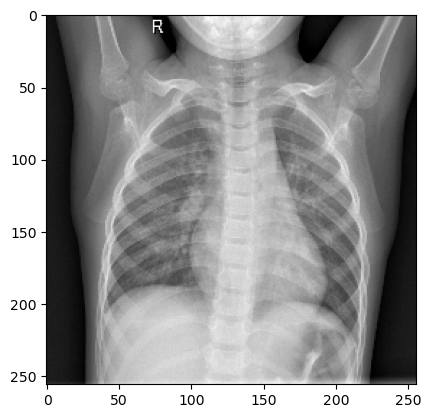

In [59]:
plt.imshow(train_X[0])

In [60]:
train_permute = np.random.permutation(len(train_X))
train_X = train_X[train_permute]
train_Y = train_Y[train_permute]


val_permute = np.random.permutation(len(val_X))
val_X = train_X[val_permute]
val_Y = train_Y[val_permute]

test_permute = np.random.permutation(len(test_X))
test_X = train_X[test_permute]
test_Y = train_Y[test_permute]

In [61]:
cnn = models.Sequential()

shape = train_X.shape[1:]

cnn.add(layers.Conv2D(32,(5,5),padding='same',activation='relu', input_shape=shape))
layers.BatchNormalization(),
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=(128,128,10)))
layers.BatchNormalization(),
cnn.add(layers.MaxPooling2D((2,2)))  

cnn.add(layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=(128,128,10)))
layers.BatchNormalization(),
cnn.add(layers.MaxPooling2D((2,2)))  
        
cnn.add(layers.Flatten())
cnn.add(layers.Dense(256,activation='relu'))
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Dense(256,activation='relu'))
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Dense(2,activation='softmax'))

In [62]:
cnn.summary()

cnn.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

cnn.fit(
  train_X,
  to_categorical(train_Y),
  epochs=4,
  validation_data=(val_X, to_categorical(val_Y)),
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 32)        25632     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 32)      